# Solve two particles in a box with (softened) Coulomb interaction

This code is provided as a teaching aid for "Quantum Mechanics and the Chemical Bond", an undergraduate course given at Tel Aviv University. It is designed for clarity and ease of use rather than efficiency.
It solves the problem of two distinguishable quantum particles in a one-dimensional box, interacting through a two-body Coulomb potential.

## General definitions
We define a discrete one-dimensional Laplacian operator $\hat{D}\equiv\frac{\partial^{2}}{\partial x^{2}}$ in matrix terms. The two-dimensional Laplacian is then given by the Kronecker product $\triangledown^{2}\equiv\hat{D}\otimes\hat{I}+\hat{I}\otimes\hat{D}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def laplacian_1D(n):
    D = -2.0 * np.eye(n)
    for i in range(n-1):
        D[i, i+1] = D[i+1, i] = 1
    return D

def laplacian_2D(n):
    D1 = laplacian_1D(n)
    return np.kron(D1, np.eye(n)) + np.kron(np.eye(n), D1)

## Parameters and calculation:
The physical parameters are Planck's constant reduce $\hbar$; the mass of the two particles $m$ (taken to be equal); the length of the box $L$; and the strength of the Coulomb interaction, $C$. Two additional numerical parameters are used: $n$ is the number of spatial discretization points, and $\eta$ is a "softening" parameter used to remove the divergence of the Coulomb potential. The code becomes exact at the limit where $n \rightarrow \infty$ and $\eta \rightarrow 0$.

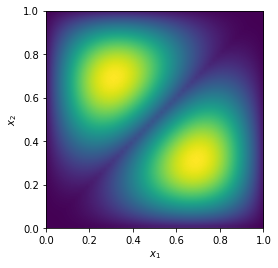

In [2]:
hbar = 1.0
m = 1.0
L = 1.0
C = 1.0

n = 50
eta = 0.001

x = np.linspace(0, L, n)
dx = x[1] - x[0]
X1 = np.kron(x, np.ones(n))
X2 = np.kron(np.ones(n), x)

T = -hbar ** 2 / (2 * m) / (dx ** 2) * laplacian_2D(n)
V = C * np.diag(1.0 * np.abs(1.0 / (X1 - X2 + eta * 1j)))
H = T + V

E, U = np.linalg.eigh(H)

psi0 = U[:,0].reshape(n, n)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.imshow(psi0[:,::-1], interpolation='bilinear', extent=[0, L, 0, L])
plt.show();